In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:/Machine Learning/Data Files/Data Files/3. ST Academy - Decision Trees resource files/Movie_classification.csv",header=0)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [4]:
#Missing Value Imputation
df['Time_taken'].fillna(value=df['Time_taken'].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [5]:
#Dummy Variable Creation
df=pd.get_dummies(df,columns=["3D_available","Genre"],drop_first=True)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [6]:
#X-Y Split
x=df.loc[:,df.columns != "Start_Tech_Oscar"]
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [7]:
y=df["Start_Tech_Oscar"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [8]:
#Test-Train Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#Training Classification Tree
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
#Predict Value using trained model
y_train_pred=clftree.predict(x_train)
y_test_pred=clftree.predict(x_test)
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [11]:
#Model Performance
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [12]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [13]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

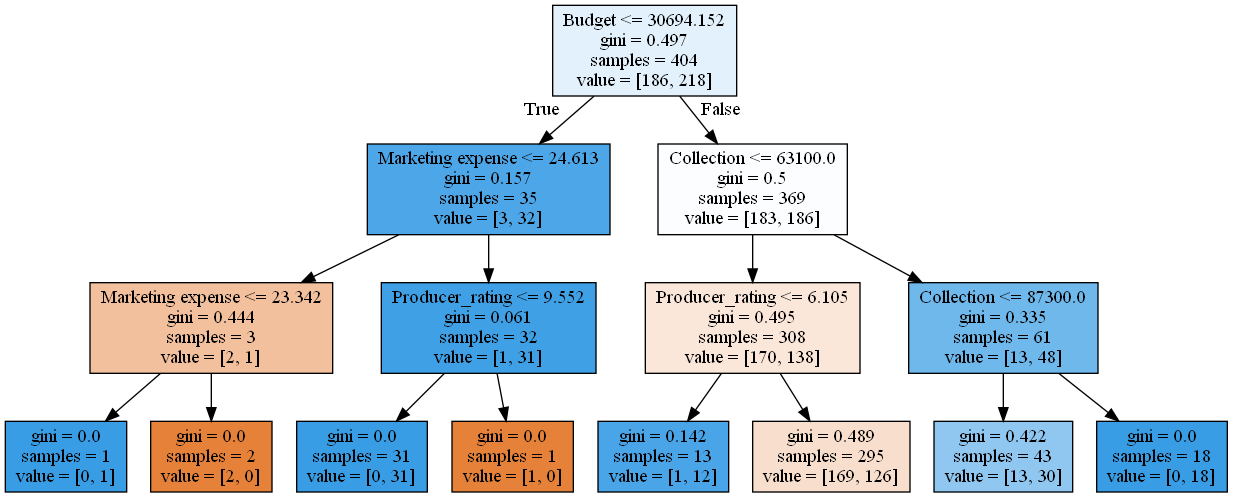

In [14]:
#Plotting Decision Tree
from IPython.display import Image
import pydotplus
dot_data=tree.export_graphviz(clftree,out_file=None,feature_names=x_train.columns,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

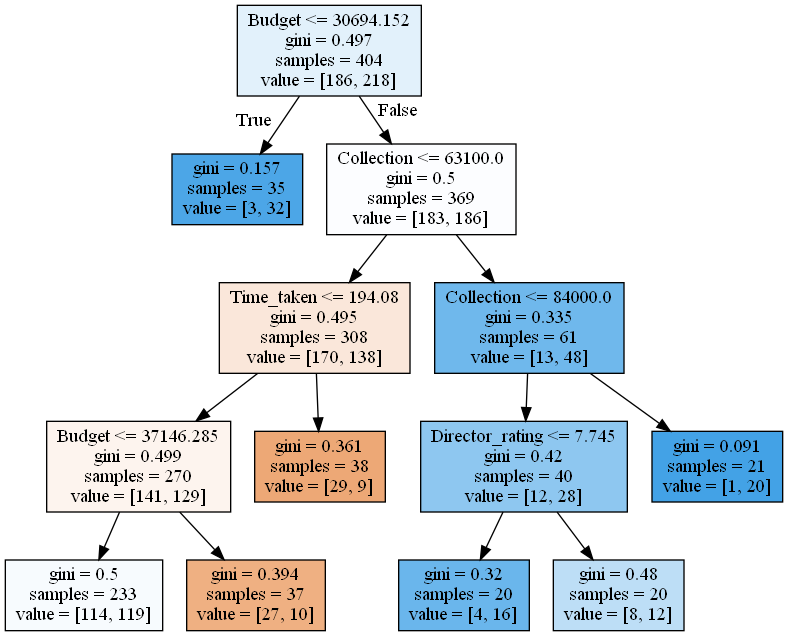

In [15]:
#Controlling Tree Growth
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)
clftree2.fit(x_train,y_train)
dot_data=tree.export_graphviz(clftree2,out_file=None,feature_names=x_train.columns,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [16]:
accuracy_score(y_test,clftree2.predict(x_test))

0.5588235294117647

# Bagging

In [17]:
from sklearn.ensemble import BaggingClassifier
clftree3=tree.DecisionTreeClassifier()
bag_clf=BaggingClassifier(base_estimator=clftree3,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)
bag_clf.fit(x_train,y_train)
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [18]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.6176470588235294

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rf_clf.fit(x_train,y_train)
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[24, 20],
       [18, 40]], dtype=int64)

In [20]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.6274509803921569

# Grid Search

In [22]:
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)
params_grid={"max_features":[4,5,6,7,8,9,10],
            "min_samples_split":[2,3,10],}
grid_search=GridSearchCV(rf_clf,params_grid,n_jobs=-1,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [23]:
cvrf_clf=grid_search.best_estimator_
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6274509803921569

# Gradient Boosting 

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf=GradientBoostingClassifier(learning_rate=0.02,n_estimators=250,max_depth=1)
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=250)

In [27]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.5882352941176471

# Ada Boost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(rf_clf,learning_rate=0.05,n_estimators=500)
ada_clf.fit(x_train,y_train)
accuracy_score(y_test,ada_clf.predict(x_test))

0.5980392156862745